In [154]:
from netCDF4 import Dataset
import numpy as np

In [155]:
fh = Dataset("data_eu_last_month.nc", mode='r')
for var in fh.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    long_name: longitude
    units: degrees_east
unlimited dimensions: 
current shape = (700,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    long_name: latitude
    units: degrees_north
unlimited dimensions: 
current shape = (420,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 level(level)
    long_name: level
    units: m
unlimited dimensions: 
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    long_name: ANALYSIS time from 20201021
    units: hours
unlimited dimensions: time
current shape = (768,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 ecff_conc(time, level, latitude, longitude)
    _FillValue: -999.0
    species: PM2.5 Elementa

<ipython-input-155-f345481fa2ad>:3: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(var)


In [156]:
lons = fh.variables['longitude'][:]
lats = fh.variables['latitude'][:]
alldata=[fh['ecff_conc'][t,0,:,:] for t in range(fh['time'].shape[0])]
tmax=fh['time'].shape[0]
time=[str(datetime.datetime(2020,10,21)+datetime.timedelta(hours = i)) for i in range(tmax)]


In [157]:
a=np.array([lons[lons>300]-360])
b=np.array([lons[lons<300]])
lons=np.concatenate((a, b), axis=None)

In [158]:
fh.close()

In [159]:
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature


import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import datetime
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['animation.embed_limit'] = 2**128
mpl.rc('font', size=16) 

In [160]:
# fig, ax = plt.subplots(1,1,dpi=100) 
# fig.set_size_inches(8,8)

# ax = plt.axes(projection=ccrs.PlateCarree())
# ax.add_feature(cfeature.BORDERS, linestyle='-')
# ax.coastlines()
# ax.set_extent([-6, 3, 48, 58], crs=ccrs.PlateCarree())

# ax.gridlines(draw_labels=True, x_inline=False, y_inline=False)


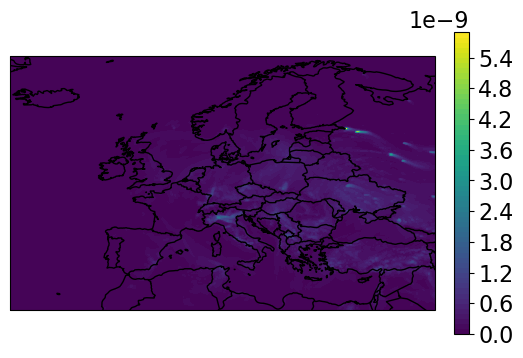

In [161]:
fig, ax = plt.subplots(1,1,dpi=100) 
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle='-')
ax.coastlines()
cf=plt.contourf(lons, lats, alldata[0],levels=64,transform=ccrs.PlateCarree())
plt.colorbar(cf,fraction=0.046, pad=0.04)


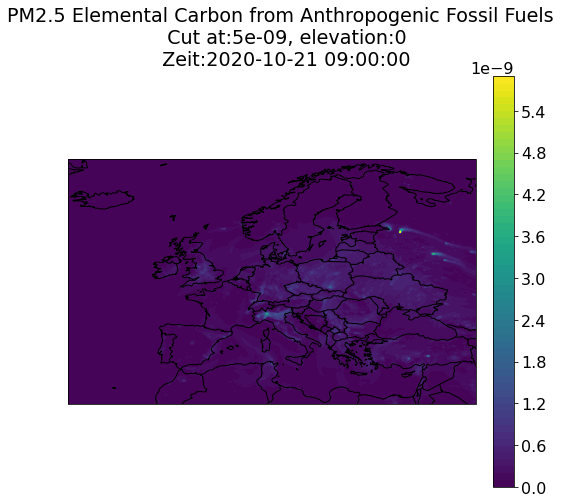

In [183]:
#https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/advanced_plotting.html
fig, ax = plt.subplots(figsize=(8, 8),
                       subplot_kw={'projection': ccrs.PlateCarree()})

vmin=0
vmax=5e-9


def animate(i):
    data=alldata[i]#ds['co_conc'][i,0,:,:]
    fig.clf()
    ax = plt.axes(projection=ccrs.PlateCarree())
    print(i/length*100,end="\r")
    #cf.set_array(data)
    fig.suptitle(f"PM2.5 Elemental Carbon from Anthropogenic Fossil Fuels \n Cut at:{vmax}, elevation:0\n Zeit:{time[i]}")
    ax.add_feature(cfeature.BORDERS, linestyle='-')
    ax.coastlines()
    ax.contourf(lons, lats, data,levels=64,transform=ccrs.PlateCarree(),vmin=vmin, vmax=vmax )
    plt.colorbar(cf,fraction=0.046, pad=0.04)
    
length=10
anim = animation.FuncAnimation(fig, animate, frames=length, repeat = False)
HTML(anim.to_html5_video())

<ipython-input-183-f2725c2ef596>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(projection=ccrs.PlateCarree())


--- 10.09557294845581 seconds ---


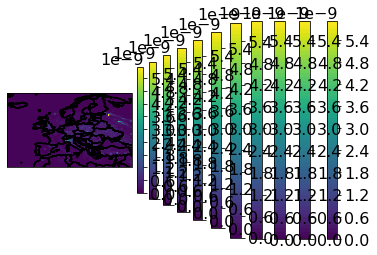

In [184]:
import time as tm

start_time = tm.time()

Writer = animation.writers['ffmpeg']
writer = Writer(fps=1, metadata=dict(artist='Moin'))
anim.save('eu24_3.mp4', writer=writer)

print("--- %s seconds ---" % (tm.time() - start_time))
